In [1]:
import numpy as np
import pyvista as pv
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
points = pv.read("points.vtk").points

In [3]:
def loss(x):
    center = [x[0], x[1], x[2]]
    r = x[3]
#     return np.sum((np.linalg.norm(points - center, axis=1) - r)**2)
    result = np.sum(np.maximum(np.linalg.norm(points - center, axis=1) - r, 0.0))
    if result == 0.0:
        result += np.sum(np.abs(np.linalg.norm(points - center, axis=1) - r))
    return result

In [4]:
x0 = [1.0, 1.0, 1.0, 10]
res = minimize(loss, x0).x

In [5]:
res

array([ 0.97822665, -0.02949734, -0.2668111 ,  8.71657762])

In [6]:
losses = []
radii = np.arange(5.0, 13.0, 0.1)
for r in tqdm(radii):
    losses.append(loss([0,0,0,r]))

  0%|          | 0/80 [00:00<?, ?it/s]

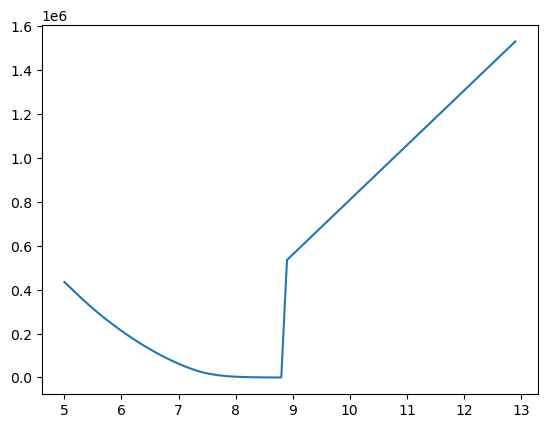

In [7]:
_ = plt.plot(radii, losses)

In [8]:
sphere = pv.Sphere(radius=res[3], center=[res[0], res[1], res[2]])

/Users/mkalai/miniconda3/envs/dev/lib/python3.11/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/Users/mkalai/miniconda3/envs/dev/lib/python3.11/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


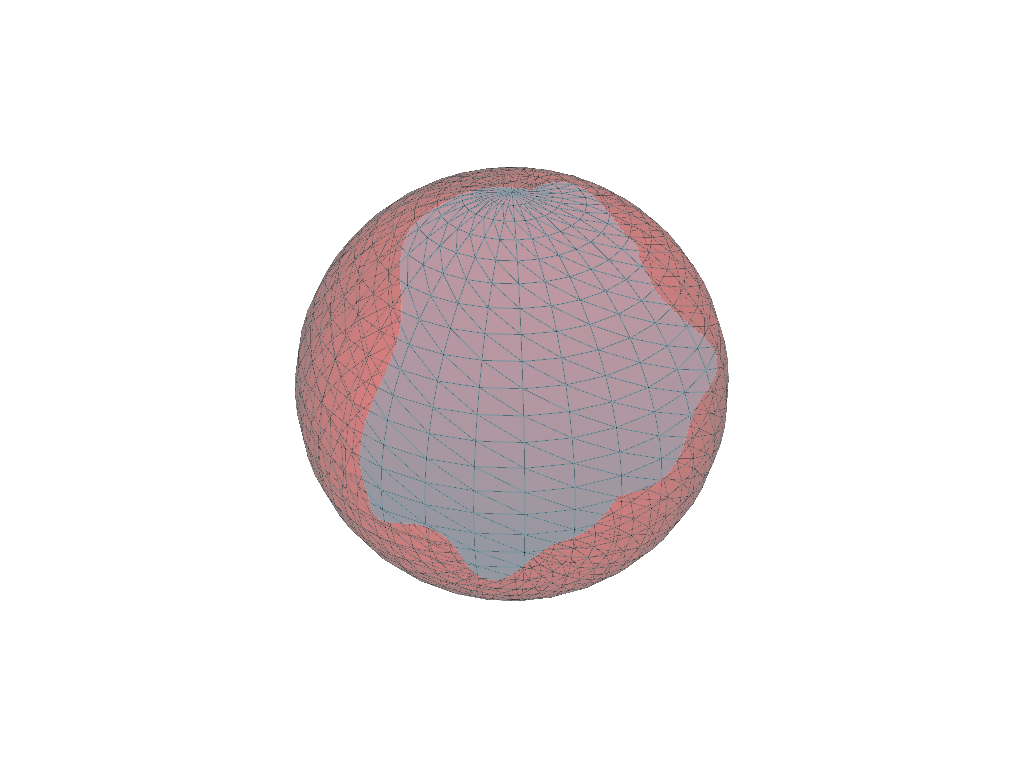

In [9]:
p = pv.Plotter()
p.add_mesh(points)
p.add_mesh(sphere, color="red", opacity=0.3, show_edges=True)
p.show()